<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [127]:
!pip install pandas

In [128]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [6]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-07 21:17:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  83.1MB/s    in 1.8s    

2025-07-07 21:17:04 (83.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

In [5]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


In [133]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


### Load the data


In [134]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [135]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



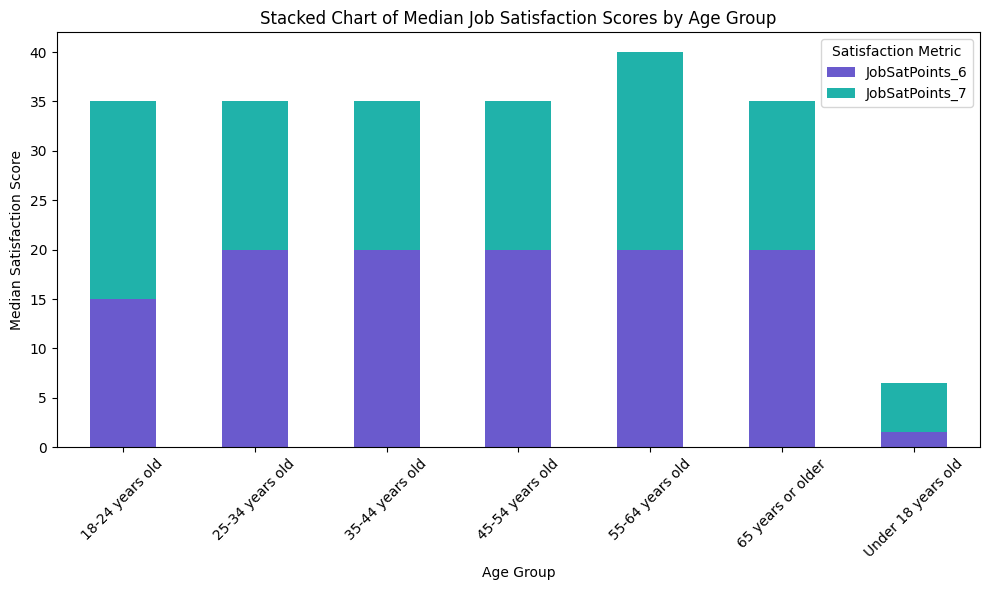

In [137]:
# Run the query
query = """WITH Cleaned AS (
    SELECT 
        Age,
        JobSatPoints_6,
        JobSatPoints_7
    FROM main
    WHERE 
        JobSatPoints_6 IS NOT NULL AND
        JobSatPoints_7 IS NOT NULL AND
        Age NOT IN ('Prefer not to say')
),
Ranked AS (
    SELECT 
        Age,
        JobSatPoints_6,
        JobSatPoints_7,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY JobSatPoints_6) AS rn6,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY JobSatPoints_7) AS rn7,
        COUNT(*) OVER (PARTITION BY Age) AS total
    FROM Cleaned
)
SELECT 
    Age,
    AVG(CASE WHEN rn6 IN ((total + 1) / 2, (total + 2) / 2) THEN JobSatPoints_6 END) AS Median_JobSatPoints_6,
    AVG(CASE WHEN rn7 IN ((total + 1) / 2, (total + 2) / 2) THEN JobSatPoints_7 END) AS Median_JobSatPoints_7
FROM Ranked
GROUP BY Age
ORDER BY Age;"""
df_medians = pd.read_sql_query(query, conn)
df_medians = pd.read_sql_query(query, conn)
df_medians.set_index('Age', inplace=True) 
df_medians.plot(kind='bar', stacked=True, figsize=(10,6), color=['#6a5acd', '#20b2aa'])

plt.title("Stacked Chart of Median Job Satisfaction Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Satisfaction Score")
plt.legend(["JobSatPoints_6", "JobSatPoints_7"], title="Satisfaction Metric")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


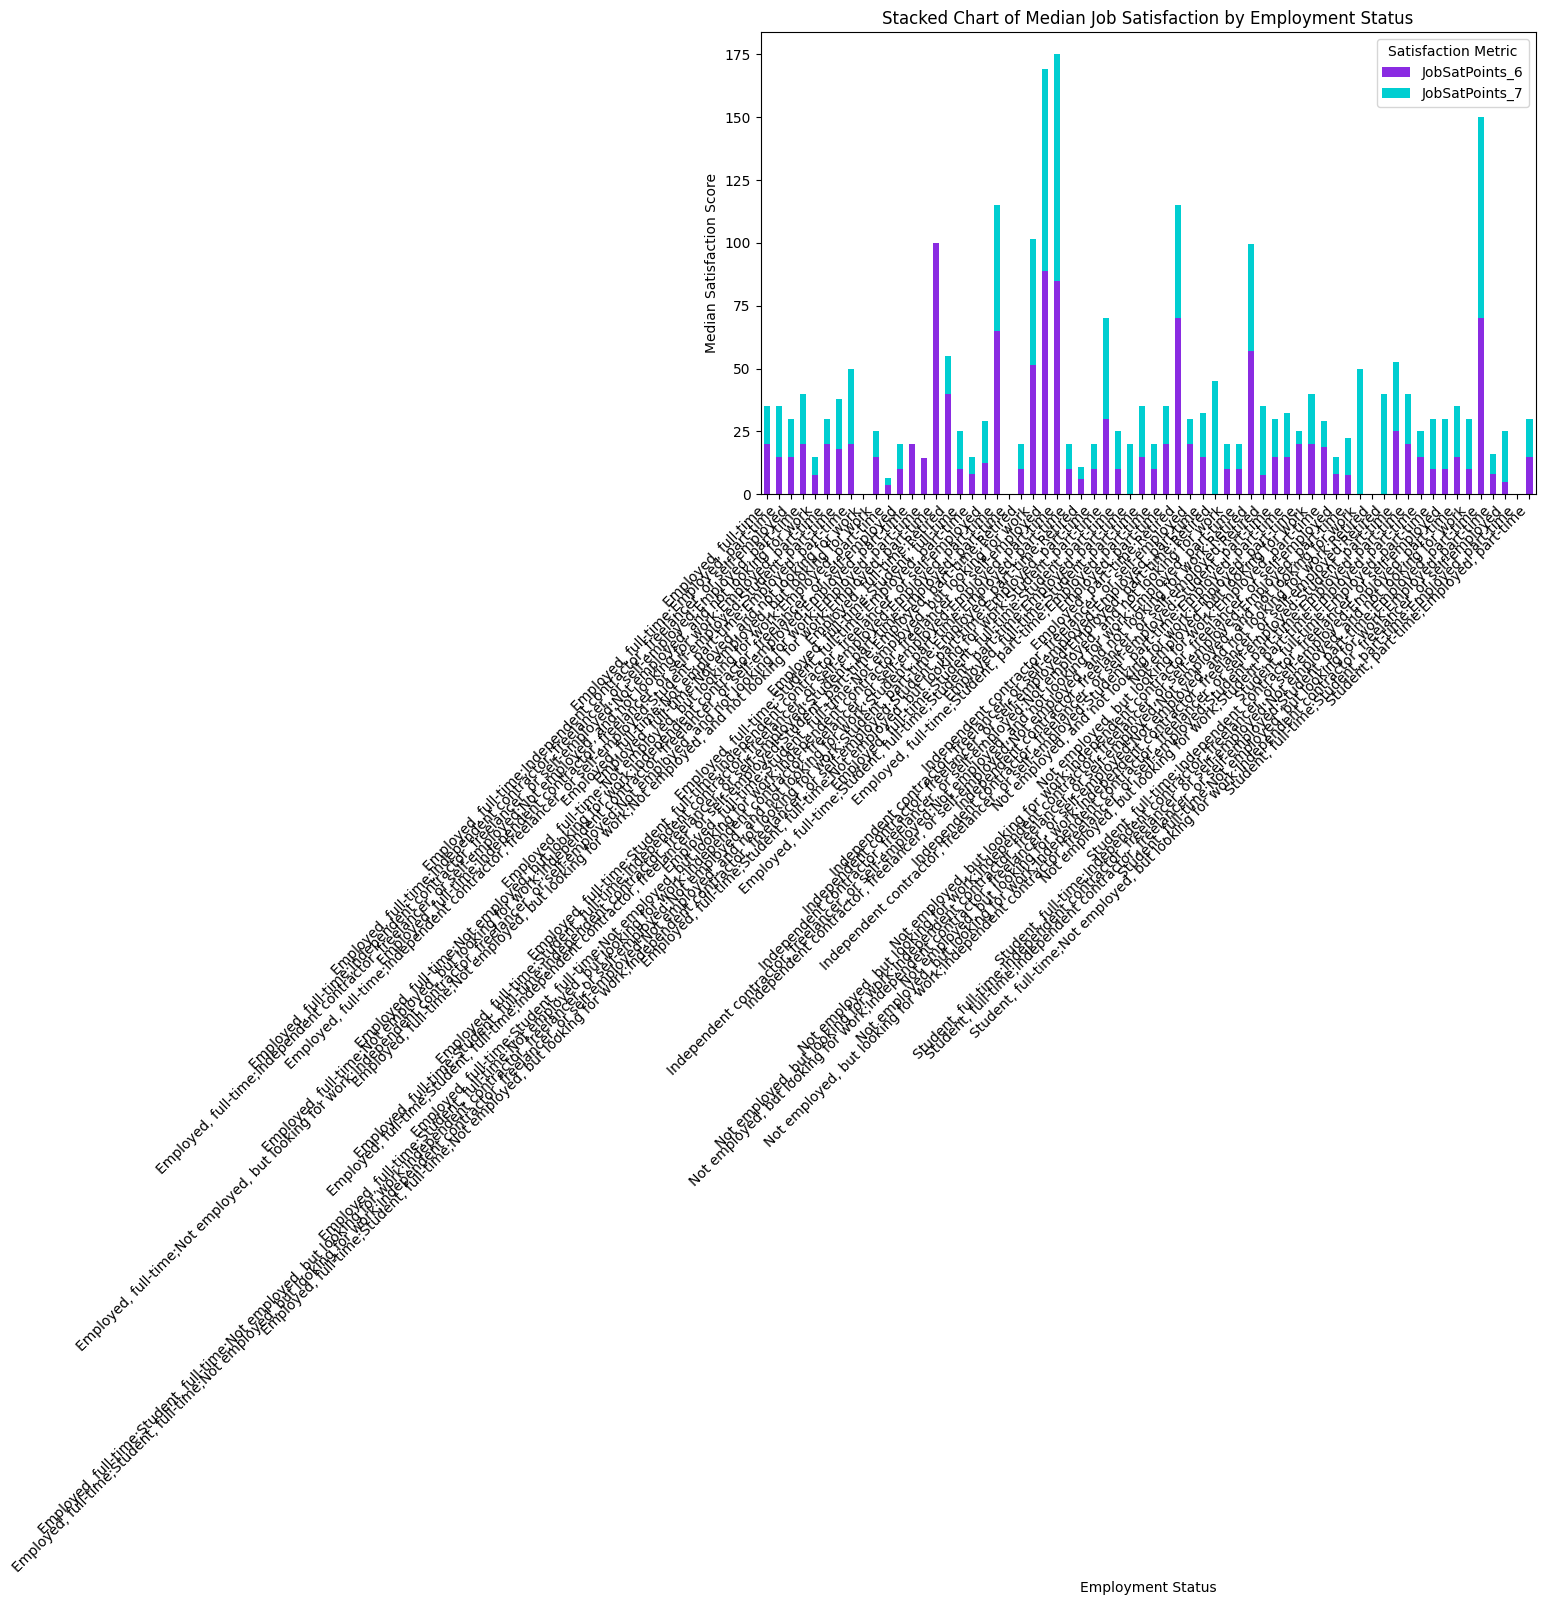

In [138]:
query = """
WITH Cleaned AS (
    SELECT 
        Employment,
        JobSatPoints_6,
        JobSatPoints_7
    FROM main
    WHERE 
        JobSatPoints_6 IS NOT NULL AND
        JobSatPoints_7 IS NOT NULL AND
        Employment IS NOT NULL
),
Ranked AS (
    SELECT 
        Employment,
        JobSatPoints_6,
        JobSatPoints_7,
        ROW_NUMBER() OVER (PARTITION BY Employment ORDER BY JobSatPoints_6) AS rn6,
        ROW_NUMBER() OVER (PARTITION BY Employment ORDER BY JobSatPoints_7) AS rn7,
        COUNT(*) OVER (PARTITION BY Employment) AS total
    FROM Cleaned
)
SELECT 
    Employment,
    AVG(CASE WHEN rn6 IN ((total + 1) / 2, (total + 2) / 2) THEN JobSatPoints_6 END) AS Median_JobSatPoints_6,
    AVG(CASE WHEN rn7 IN ((total + 1) / 2, (total + 2) / 2) THEN JobSatPoints_7 END) AS Median_JobSatPoints_7
FROM Ranked
GROUP BY Employment
ORDER BY Employment;
"""
df_employment_medians = pd.read_sql_query(query, conn)
df_employment_medians.set_index('Employment', inplace=True)
df_employment_medians.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#8a2be2', '#00ced1'])

plt.title("Stacked Chart of Median Job Satisfaction by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Median Satisfaction Score")
plt.legend(["JobSatPoints_6", "JobSatPoints_7"], title="Satisfaction Metric")
plt.xticks(rotation=45, ha='right')
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


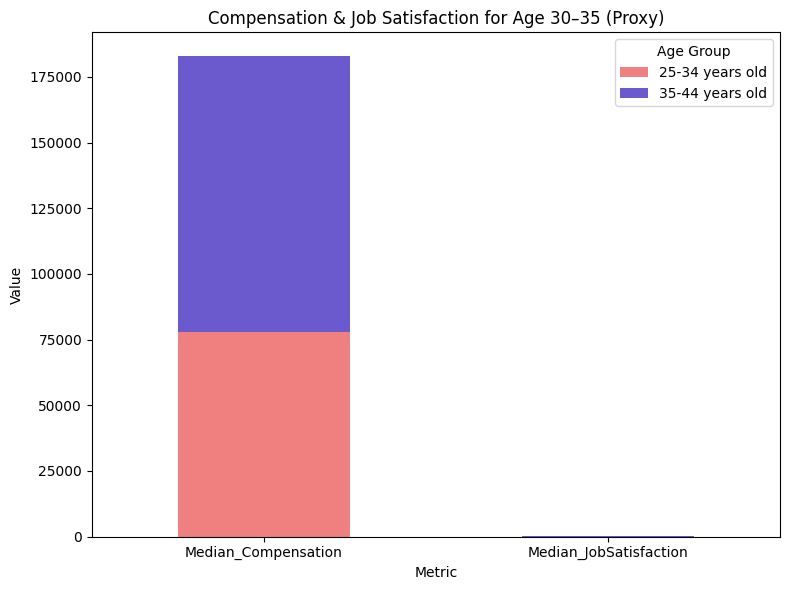

In [139]:
query = """SELECT 
    Age,
    AVG(ConvertedCompYearly) AS Median_Compensation,
    AVG(JobSatPoints_6) AS Median_JobSatisfaction
FROM main
WHERE 
    JobSatPoints_6 IS NOT NULL AND 
    ConvertedCompYearly IS NOT NULL AND 
    Age IN ('25-34 years old', '35-44 years old')
GROUP BY Age
ORDER BY Age;"""
df_comp_sat = pd.read_sql_query(query, conn)

# Transpose for stacking
df_comp_sat.set_index("Age", inplace=True)
df_comp_sat.T.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#f08080', '#6a5acd'])

plt.title("Compensation & Job Satisfaction for Age 30–35 (Proxy)")
plt.ylabel("Value")
plt.xlabel("Metric")
plt.legend(title="Age Group")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


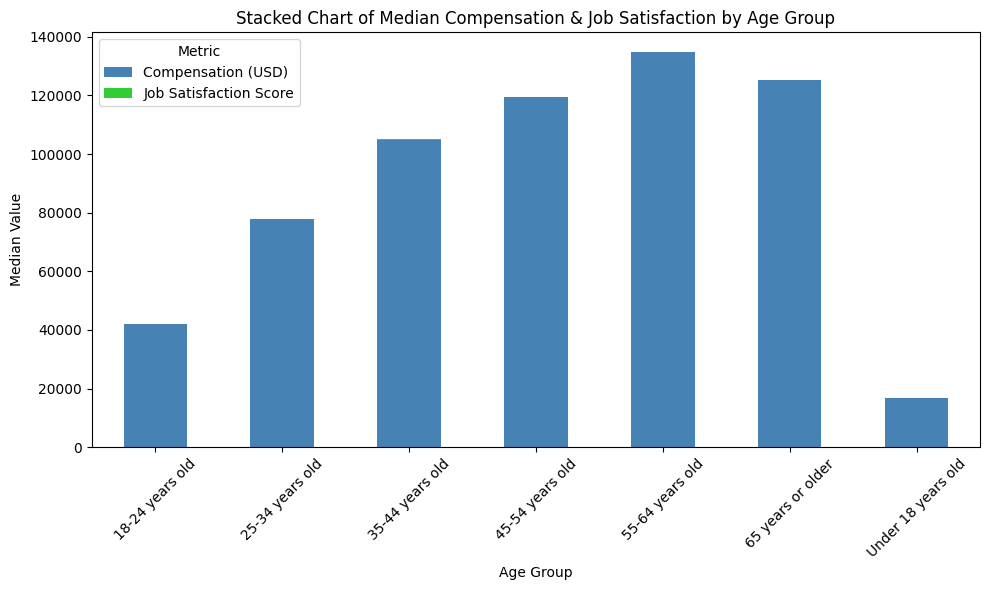

In [140]:
query = """SELECT 
    Age,
    AVG(ConvertedCompYearly) AS Median_Compensation,
    AVG(JobSatPoints_6) AS Median_JobSatisfaction
FROM main
WHERE 
    ConvertedCompYearly IS NOT NULL AND
    JobSatPoints_6 IS NOT NULL AND
    Age NOT IN ('Prefer not to say')
GROUP BY Age
ORDER BY Age;"""
df_age_chart = pd.read_sql_query(query, conn)

# Set Age as index
df_age_chart.set_index("Age", inplace=True)

# Plot stacked bar chart
df_age_chart.plot(kind="bar", stacked=True, figsize=(10, 6), color=["#4682b4", "#32cd32"])

plt.title("Stacked Chart of Median Compensation & Job Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Value")
plt.legend(["Compensation (USD)", "Job Satisfaction Score"], title="Metric")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


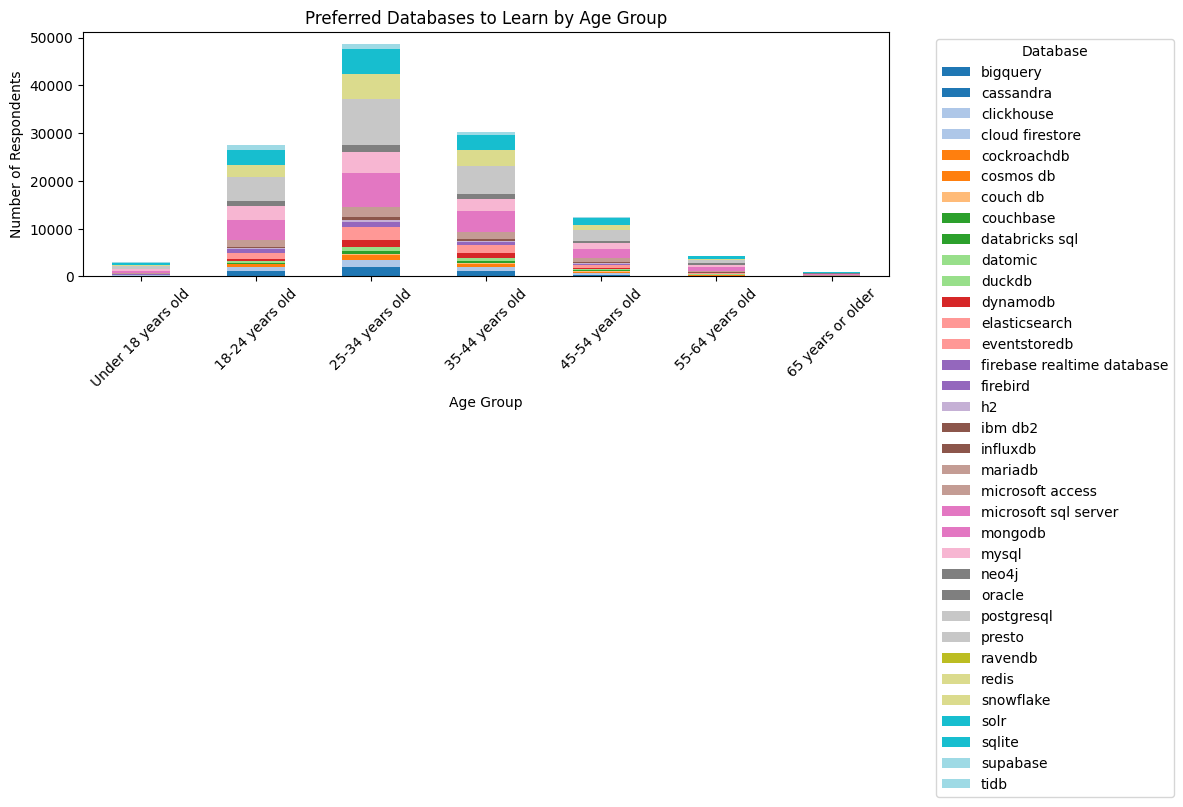

In [141]:
df = pd.read_sql_query("SELECT Age, DatabaseWantToWorkWith FROM main", conn)

# Filter out nulls and "Prefer not to say"
df = df[df["DatabaseWantToWorkWith"].notnull() & (df["Age"] != "Prefer not to say")]

# Split the delimited list into multiple rows
df_split = df.assign(DatabaseWantToWorkWith=df["DatabaseWantToWorkWith"].str.split(";")).explode("DatabaseWantToWorkWith")

# Normalize casing and remove whitespace
df_split["DatabaseWantToWorkWith"] = df_split["DatabaseWantToWorkWith"].str.strip().str.lower()

# Count preferences by age group and database
db_counts = df_split.groupby(["Age", "DatabaseWantToWorkWith"]).size().reset_index(name="Count")

# Pivot to wide format for plotting
db_pivot = db_counts.pivot(index="Age", columns="DatabaseWantToWorkWith", values="Count").fillna(0) 

# Sort age groups in expected order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
db_pivot = db_pivot.reindex(age_order)

# Plot
db_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")

plt.title("Preferred Databases to Learn by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.legend(title="Database", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


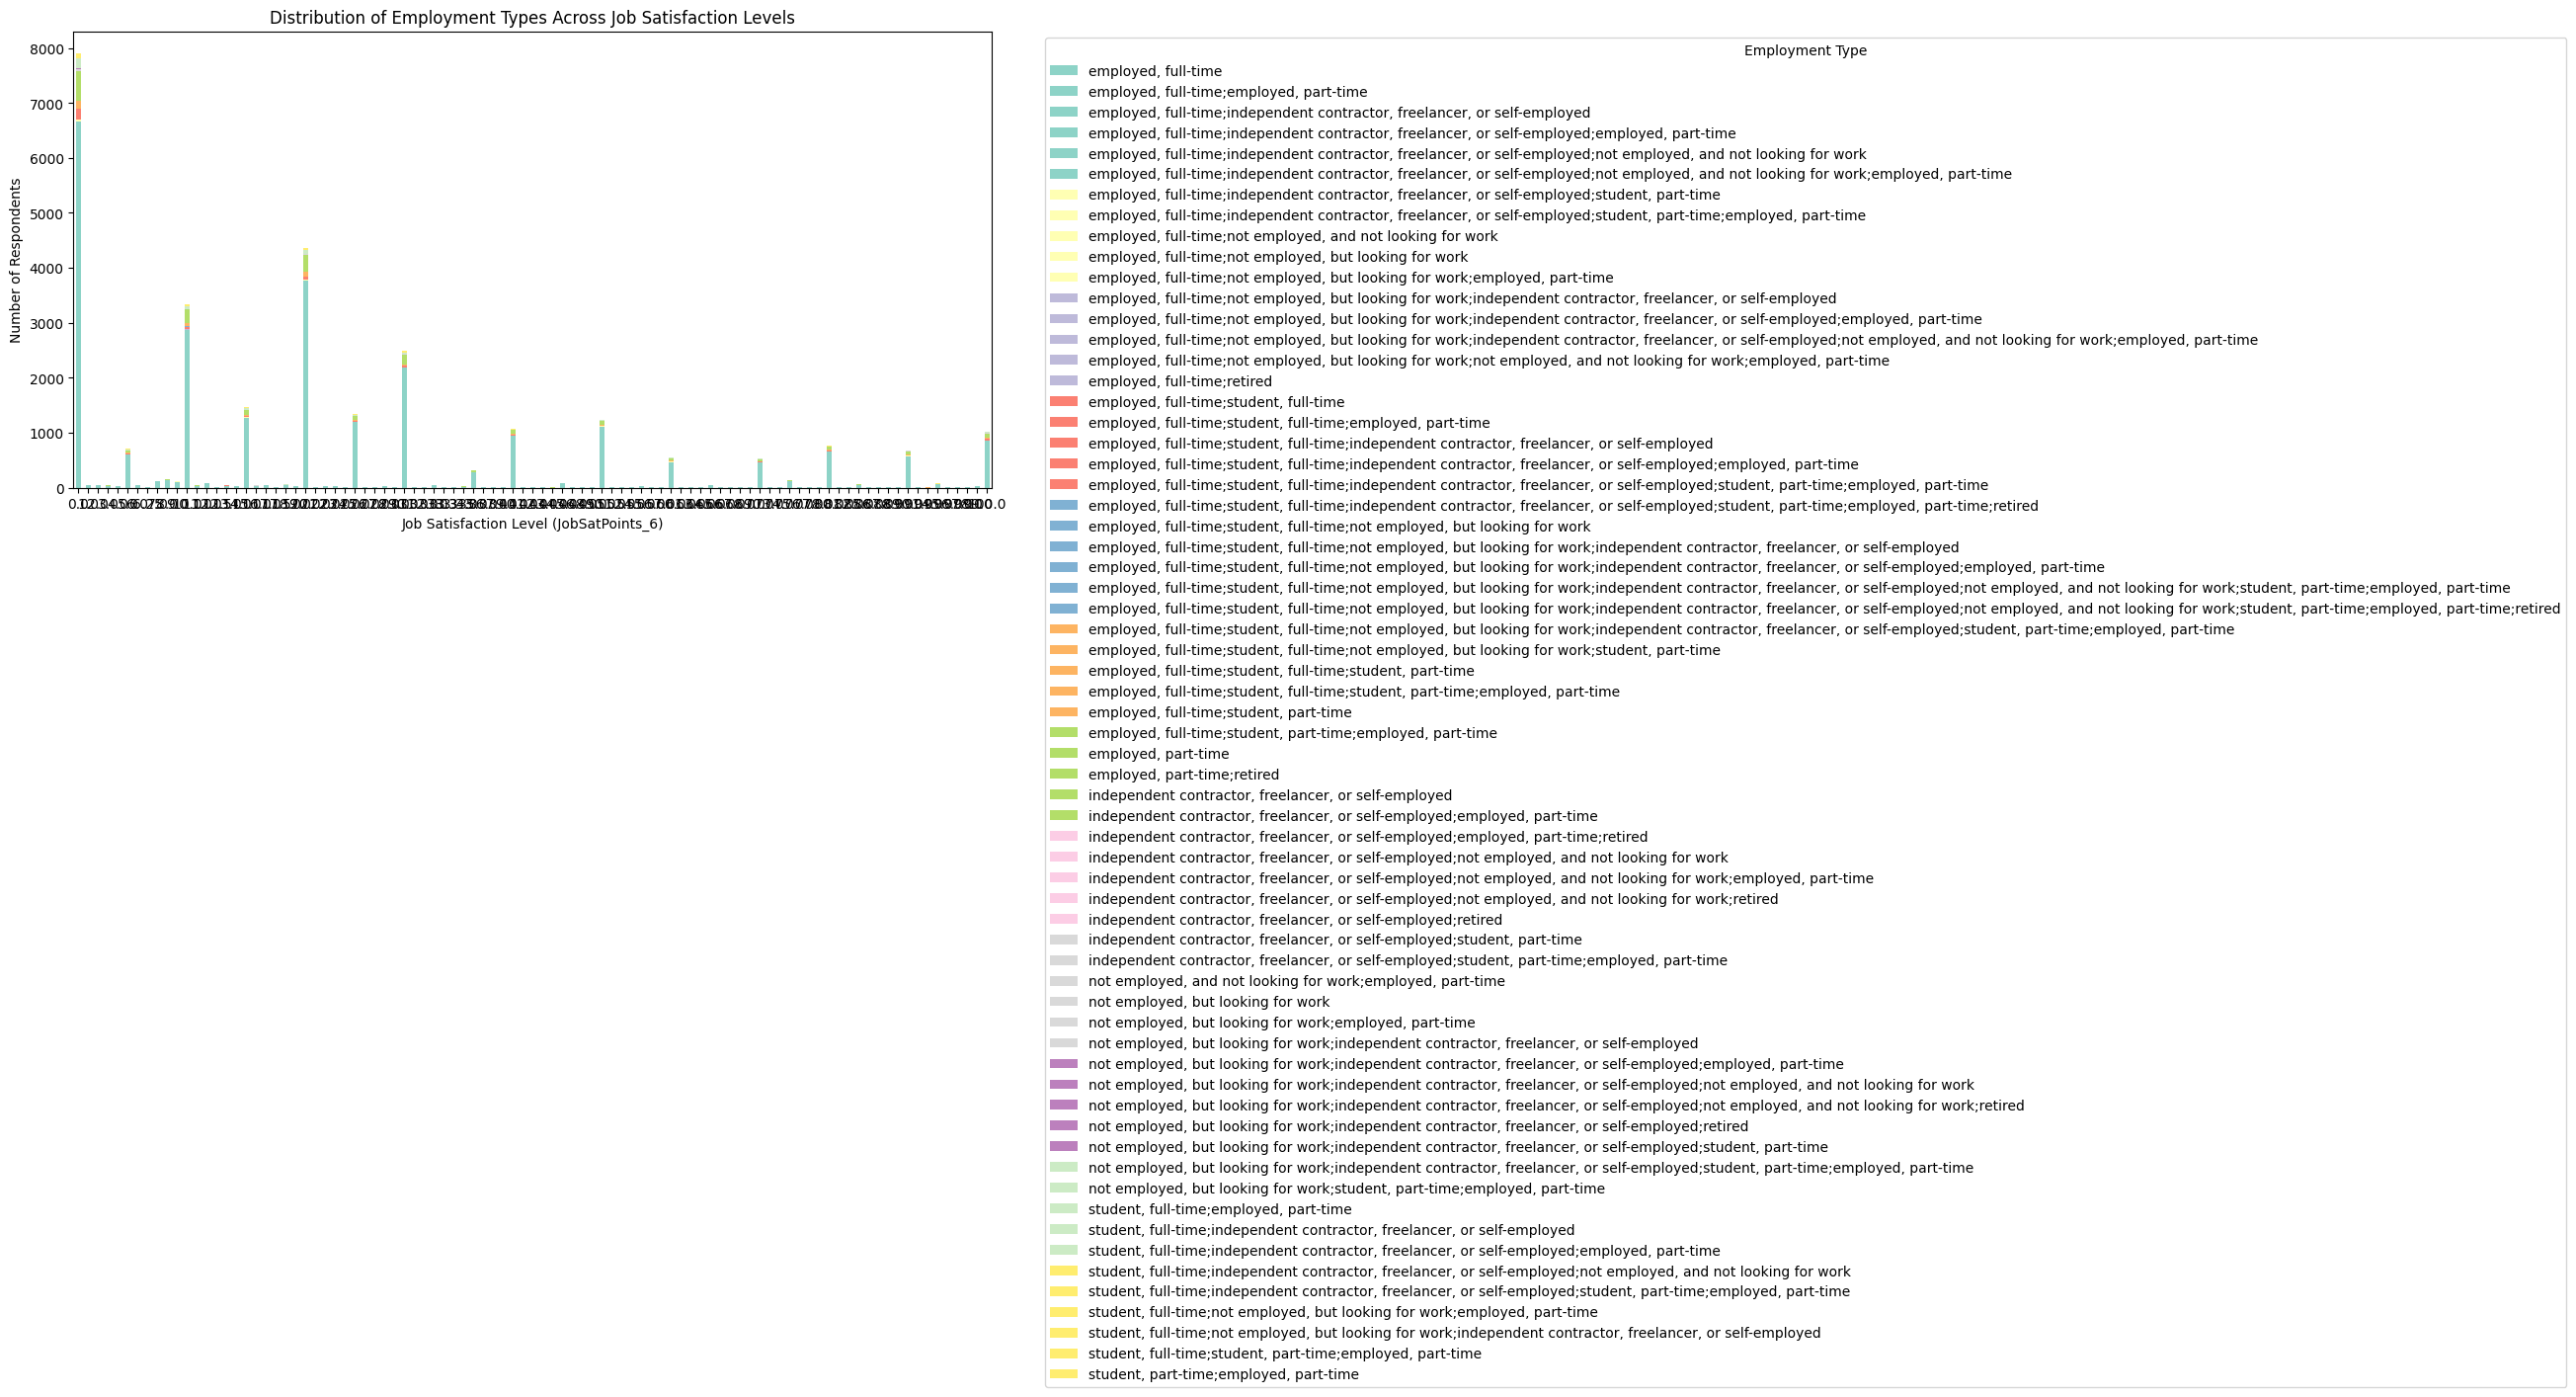

In [142]:
# Pull relevant columns and clean
query = """
SELECT JobSatPoints_6, Employment
FROM main 
WHERE JobSatPoints_6 IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Normalize employment labels
df["Employment"] = df["Employment"].str.strip().str.lower()
# Count employment types per satisfaction level
grouped = df.groupby(["JobSatPoints_6", "Employment"]).size().reset_index(name="Count")

# Pivot to prepare for stacked chart
pivot_df = grouped.pivot(index="JobSatPoints_6", columns="Employment", values="Count").fillna(0)

# Sort by satisfaction level if needed
pivot_df = pivot_df.sort_index()

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title("Distribution of Employment Types Across Job Satisfaction Levels")
plt.xlabel("Job Satisfaction Level (JobSatPoints_6)")
plt.ylabel("Number of Respondents")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_300/3181599635.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


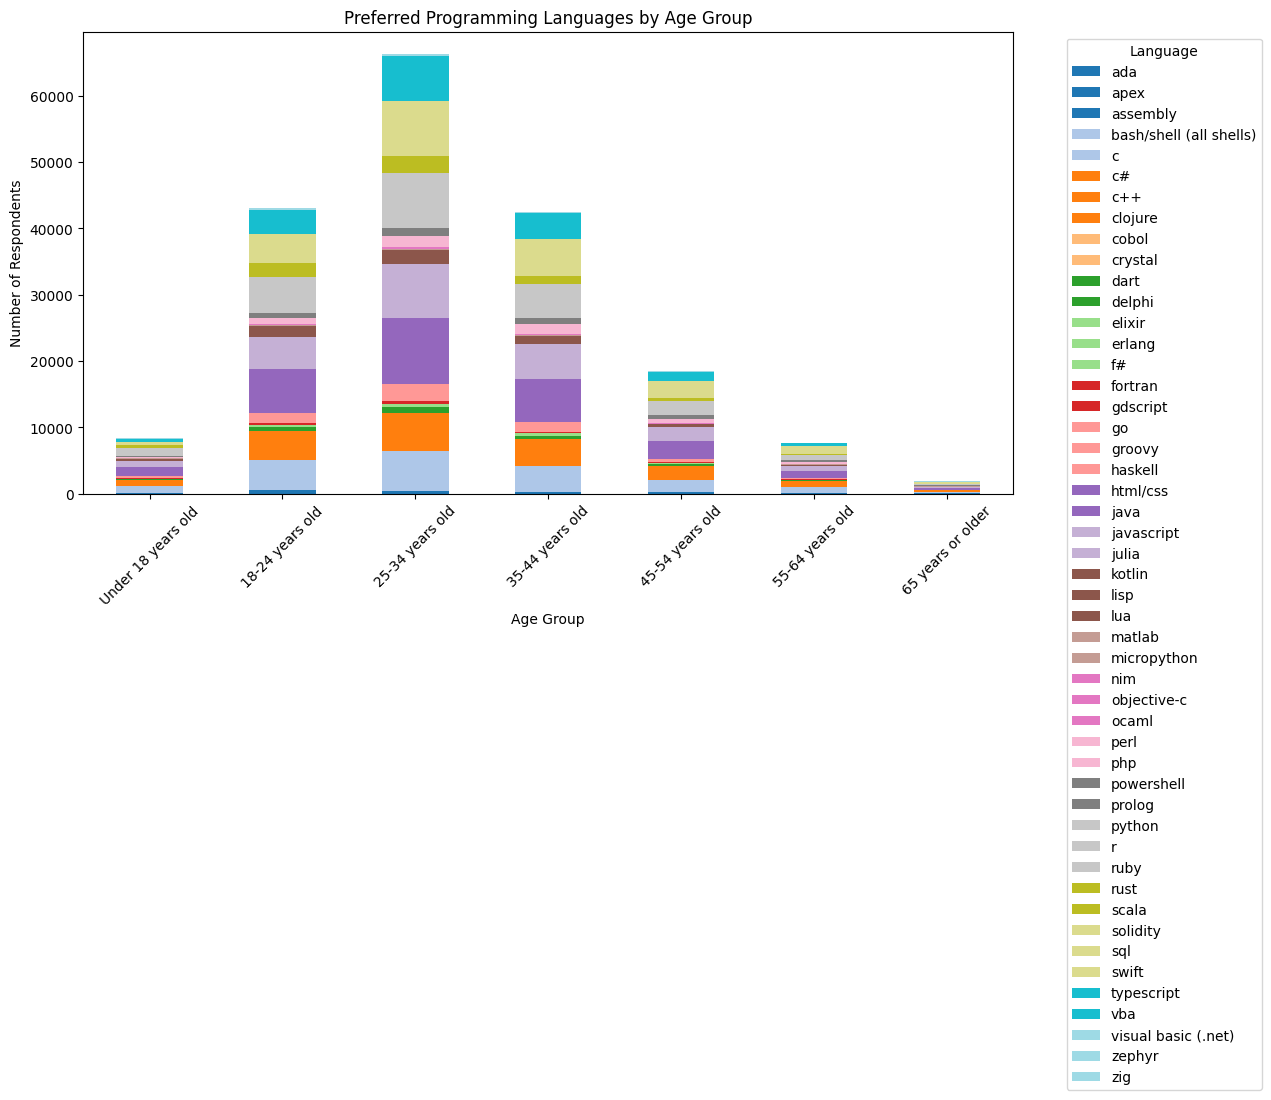

In [143]:
df = pd.read_sql_query("SELECT Age, LanguageAdmired FROM main", conn)

# Filter out missing values and 'Prefer not to say'
df = df[df["LanguageAdmired"].notnull() & (df["Age"] != "Prefer not to say")]

# Split semicolon-separated languages into multiple rows
df_split = df.assign(LanguageAdmired=df["LanguageAdmired"].str.split(";")).explode("LanguageAdmired")

# Clean formatting: strip whitespace & normalize casing
df_split["LanguageAdmired"] = df_split["LanguageAdmired"].str.strip().str.lower()
# Count frequency of each language per age group
language_counts = df_split.groupby(["Age", "LanguageAdmired"]).size().reset_index(name="Count")

# Pivot to wide format for stacked chart
language_pivot = language_counts.pivot(index="Age", columns="LanguageAdmired", values="Count").fillna(0)

# Reorder age groups
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old",
    "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"
]
language_pivot = language_pivot.reindex(age_order)
language_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")

plt.title("Preferred Programming Languages by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_300/3420180716.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


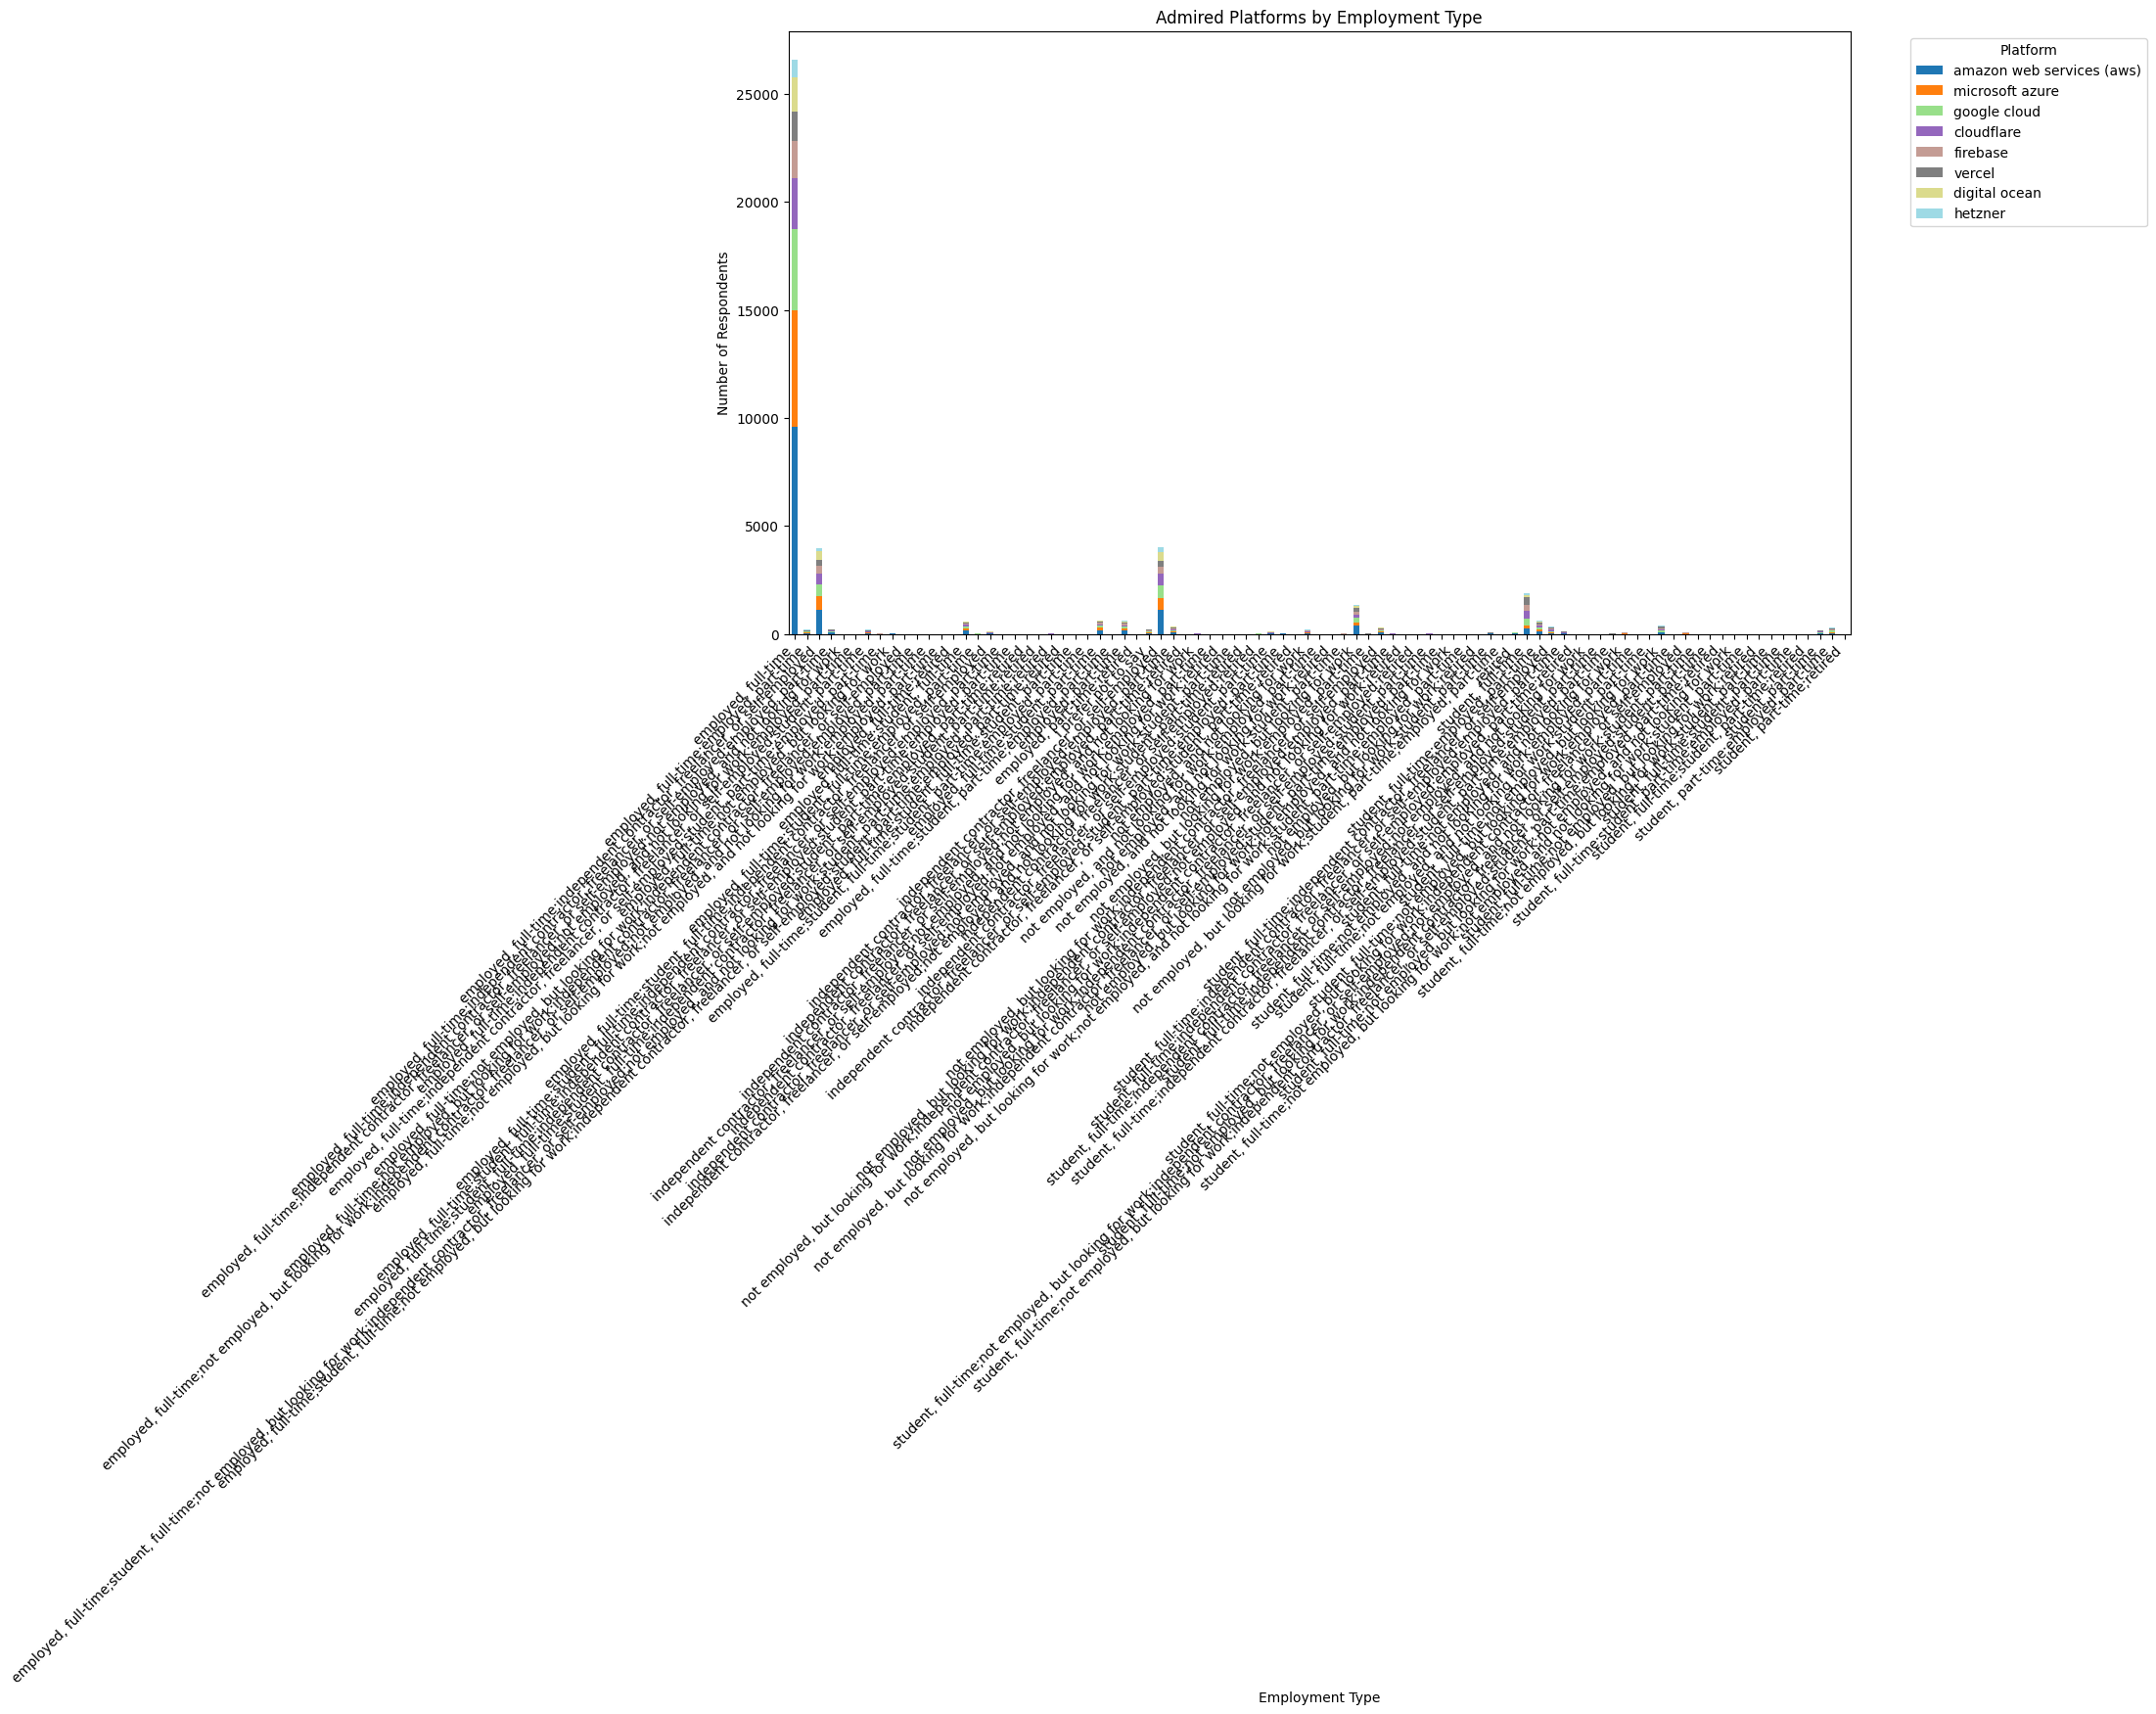

In [145]:
df = pd.read_sql_query("SELECT Employment, PlatformAdmired FROM main", conn)

# Filter out null values
df = df[df["PlatformAdmired"].notnull() & df["Employment"].notnull()]

# Split semicolon-delimited values into individual rows
df_split = df.assign(PlatformAdmired=df["PlatformAdmired"].str.split(";")).explode("PlatformAdmired")

# Normalize platform names and employment labels
df_split["PlatformAdmired"] = df_split["PlatformAdmired"].str.strip().str.lower()
df_split["Employment"] = df_split["Employment"].str.strip().str.lower()
# Count platforms across employment types
platform_counts = df_split.groupby(["Employment", "PlatformAdmired"]).size().reset_index(name="Count")

# Pivot into wide format for stacked chart
platform_pivot = platform_counts.pivot(index="Employment", columns="PlatformAdmired", values="Count").fillna(0)

# Optional: focus on top 8 admired platforms to simplify visual
top_platforms = platform_counts.groupby("PlatformAdmired")["Count"].sum().nlargest(8).index
platform_pivot = platform_pivot[top_platforms]
platform_pivot.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab20")

plt.title("Admired Platforms by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Number of Respondents")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
conn.close()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
